In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import os
import sys
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
pd.set_option("display.max_columns",None)

In [ ]:
df=pd.read_csv("/content/sample_data/Net_generation_United_States_all_sectors_monthly.csv",sep='\t')

In [ ]:
df=df.drop(df.index[0:5])

In [ ]:
columns_1 = [
    "Month",
    "all_fuels",
    "coal",
    "natural_gas",
    "nuclear",
    "conventional_hydroelectric",
    "wind",
    "all_solar"
]


In [ ]:
df["Net generation United States all sectors monthly"].str.split(",").str[3]
df[columns_1]=0


In [ ]:
len(columns_1)

8

In [ ]:
for items,i in zip(columns_1,range(len(columns_1))):
    df[f"{items}"] = df["Net generation United States all sectors monthly"].astype(str).str.split(",").str[i]

df=df.drop("Net generation United States all sectors monthly",axis=1)

In [ ]:
for col in columns_1:
  if col != "Month":
    df[col]=pd.to_numeric(df[col],errors="coerce")
  else:
    df[col]=pd.to_datetime(df[col])

<ipython-input-1062-ac97e5960525>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df.reset_index(drop=True)

,Month,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric,wind,all_solar
0,2025-01-01,401502.62962,83149.59178,156526.71341,71738.938,21192.35254,43630.08115,20735.37781
1,2024-12-01,361284.04473,62888.46959,145365.01275,71200.098,20384.32831,40343.06835,17926.20495
2,2024-11-01,324140.91112,44994.68815,137041.41254,61904.051,18275.92039,40960.54107,19314.98697
3,2024-10-01,334119.15232,46957.33506,146347.74525,58773.349,15821.35795,40053.82313,26321.80065
4,2024-09-01,359609.14705,54628.10634,169393.44023,62660.468,16665.75643,28995.20590,27848.13265
...,...,...,...,...,...,...,...,...
284,2001-05-01,300491.62100,151592.91400,50934.20500,61512.445,19175.63500,635.02900,NaN
285,2001-04-01,278078.87100,140670.65400,45842.74600,56003.026,18012.99400,684.69500,NaN
286,2001-03-01,300706.54400,155269.01100,44364.41400,62140.712,20477.18900,532.12000,NaN
287,2001-02-01,282940.19800,149735.48400,37966.92700,61272.407,17472.88900,431.24200,NaN


In [ ]:
df.head()
df.head()
months_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

list_1=["month","year"]
for month_year in list_1:
  df[f"{month_year}"]=df["Month"].dt.__getattribute__(month_year)



In [ ]:
df["month"]=[months_dict[i] for i in df.month.values]

In [ ]:
df.drop(["Month"],axis=1,inplace=True)

In [ ]:
excel_file=df.to_excel("excel_file.xlsx")

In [ ]:
df.isnull().sum()
df.duplicated().sum()


df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'all_solar', 'month', 'year'],
      dtype='object')

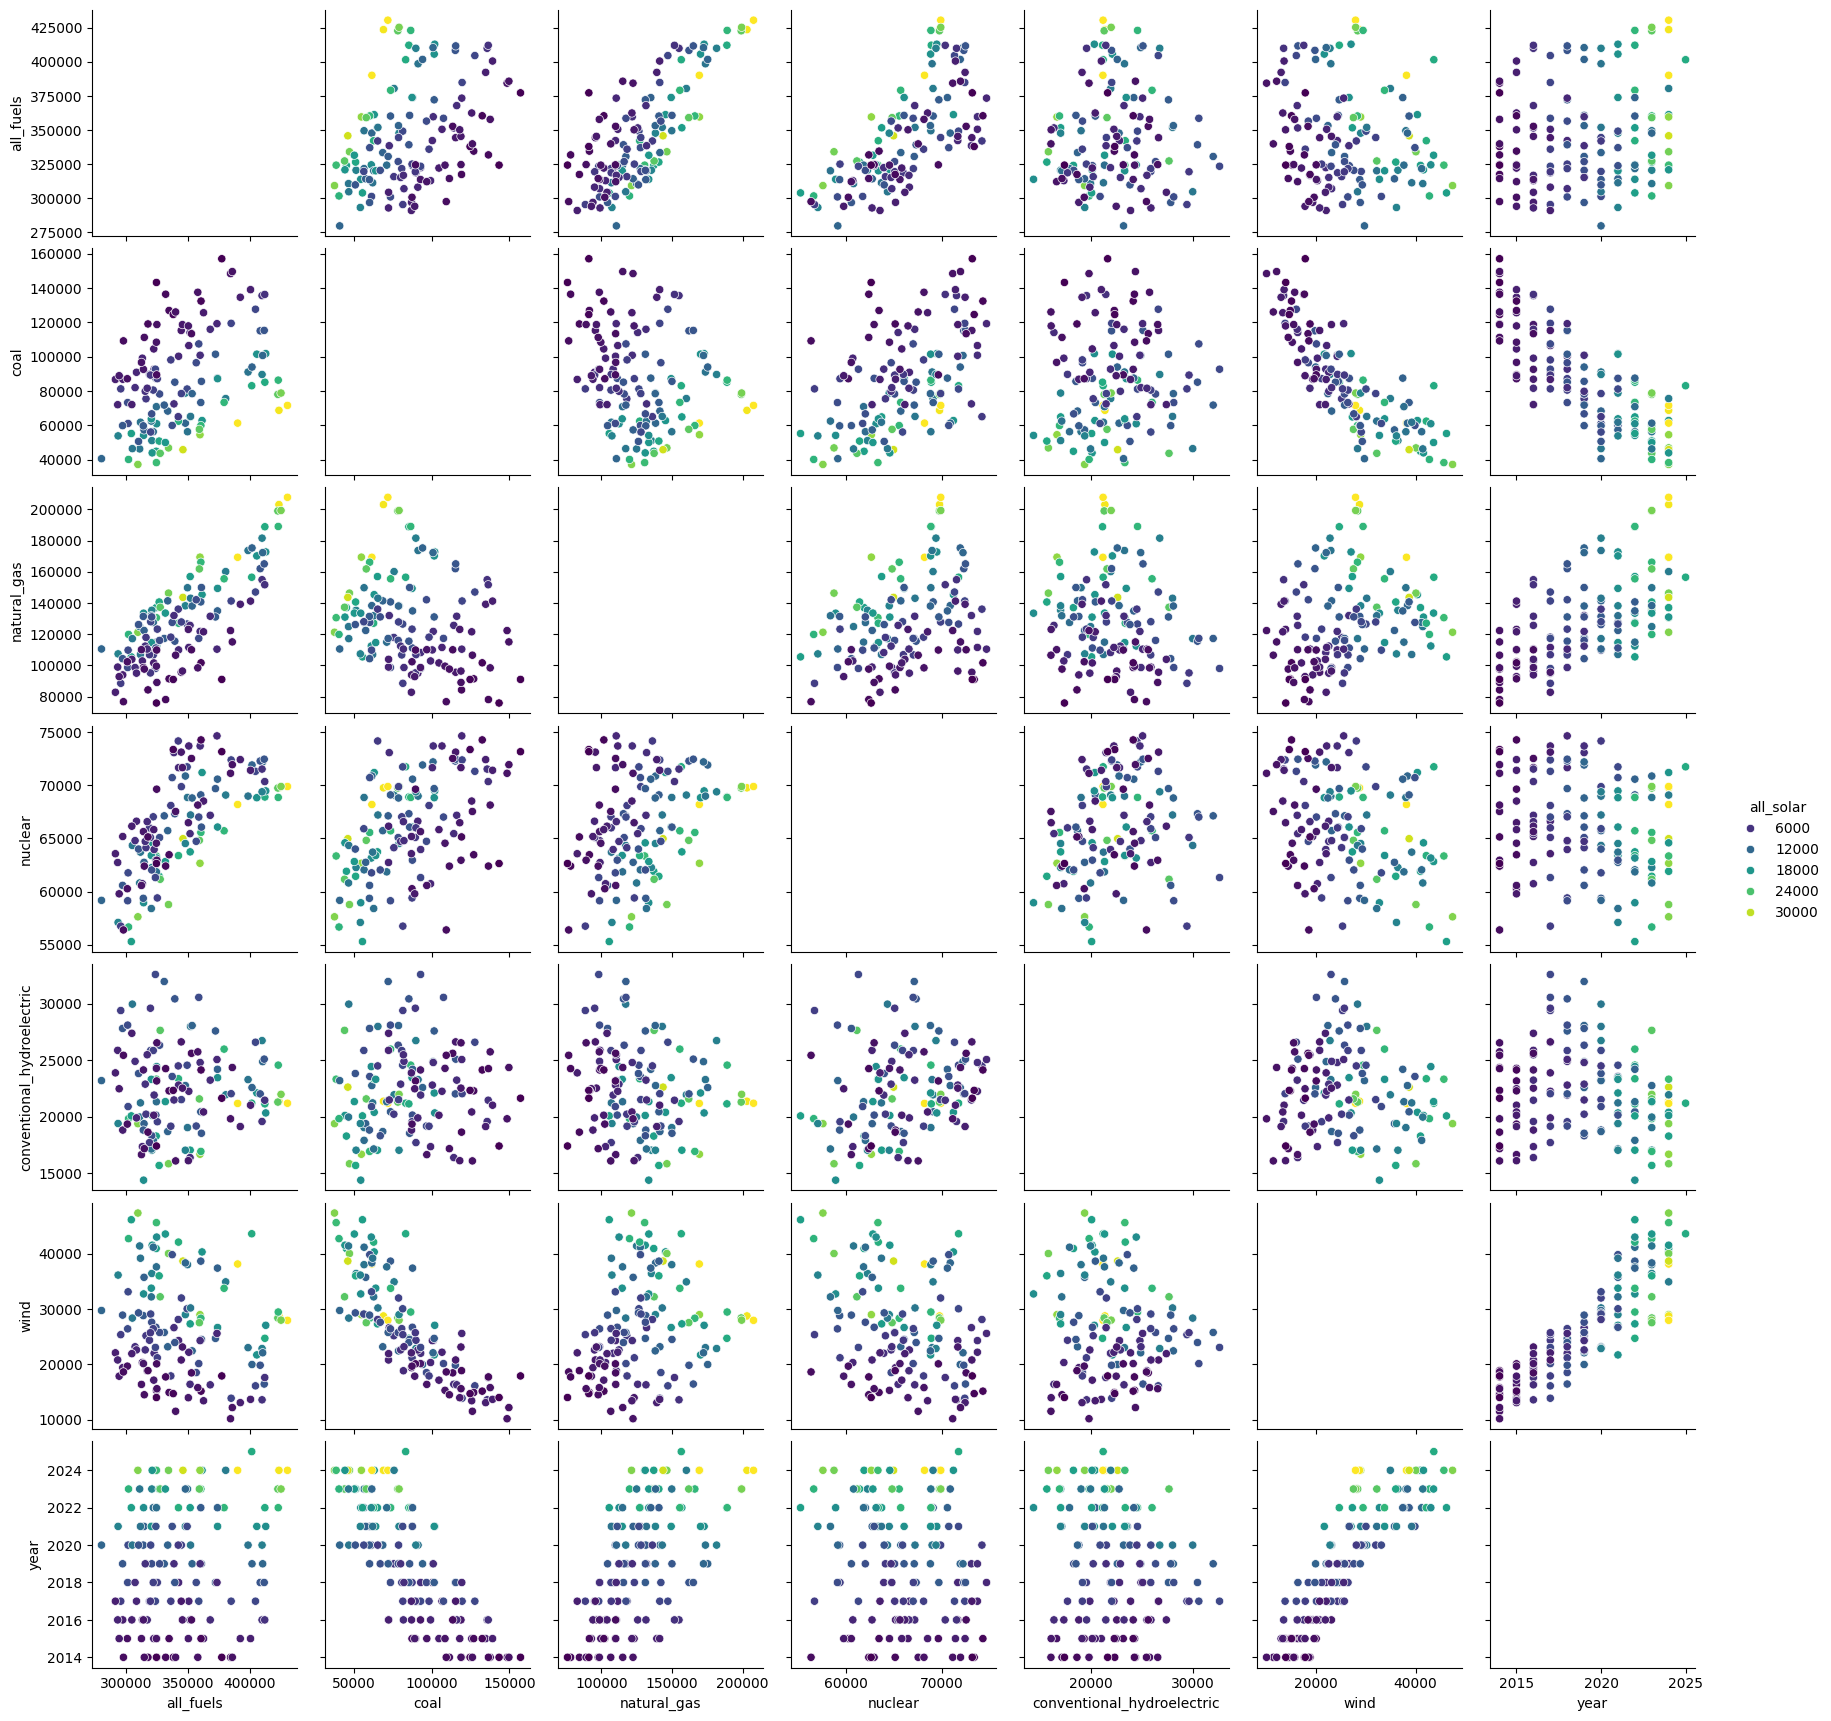

In [ ]:
sns.pairplot(df,kind="scatter",palette="viridis",hue="all_solar")

In [ ]:
numerical_cols=df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols=df.select_dtypes("object").columns.tolist()

In [ ]:
df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'all_solar', 'month', 'year'],
      dtype='object')

In [ ]:
grouped_data=df.groupby(["year","month"])[['all_fuels', 'coal', 'natural_gas', 'nuclear','conventional_hydroelectric', 'wind', 'all_solar']].agg(["mean"]).reset_index()
grouped_data.columns=["_".join(col).strip()    for col in grouped_data.columns.values]
grouped_data.columns

Index(['year_', 'month_', 'all_fuels_mean', 'coal_mean', 'natural_gas_mean',
       'nuclear_mean', 'conventional_hydroelectric_mean', 'wind_mean',
       'all_solar_mean'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go
import plotly.subplots as subplots

fig = subplots.make_subplots(rows=3, cols=3)

content = ['coal_mean', 'natural_gas_mean', 'nuclear_mean', 'conventional_hydroelectric_mean', 'wind_mean', 'all_solar_mean']

for i, cont in enumerate(content):
    row = i // 3 + 1
    col = i % 3 + 1

    trace = go.Bar(x=grouped_data["year_"], y=grouped_data[cont],name=cont)

    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=800,
    width=1500,
    title_text="Energy Source Trends Over Years (Mean Values)",
    xaxis_title="Year"
)

fig.show()



<Axes: >

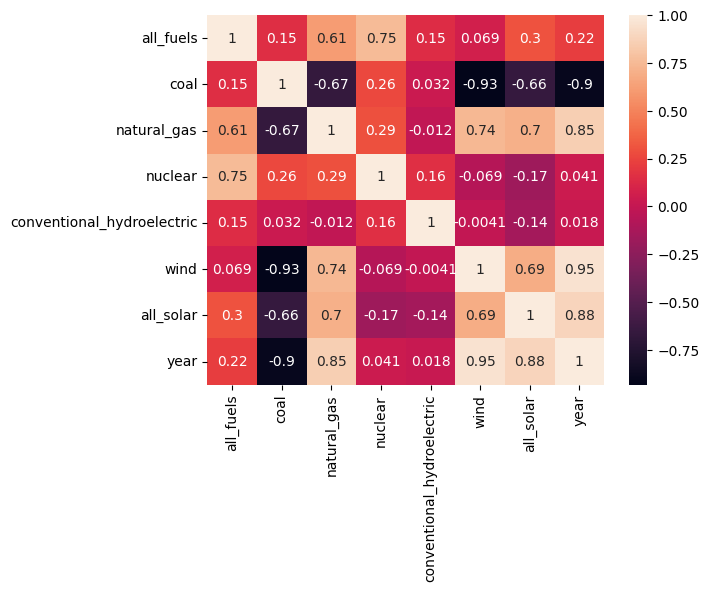

In [ ]:
#Lets find the well correlated values
sns.heatmap(df[numerical_cols].corr(),annot=True)

In [ ]:
df.head()

,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric,wind,all_solar,month,year
5,401502.62962,83149.59178,156526.71341,71738.938,21192.35254,43630.08115,20735.37781,January,2025
6,361284.04473,62888.46959,145365.01275,71200.098,20384.32831,40343.06835,17926.20495,December,2024
7,324140.91112,44994.68815,137041.41254,61904.051,18275.92039,40960.54107,19314.98697,November,2024
8,334119.15232,46957.33506,146347.74525,58773.349,15821.35795,40053.82313,26321.80065,October,2024
9,359609.14705,54628.10634,169393.44023,62660.468,16665.75643,28995.20590,27848.13265,September,2024


In [ ]:
train_df=df.drop("all_solar",axis=1)
train_df.columns
numerical_cols=train_df.select_dtypes(include=["number"]).columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
scaler=StandardScaler()
imputer=SimpleImputer(strategy="median")
encoder=OneHotEncoder(sparse_output=False)
line_reg=LinearRegression()
categorical_cols=train_df.select_dtypes('object').columns.tolist()

imputer.fit(train_df[numerical_cols])


SimpleImputer(strategy='median')

In [ ]:
def regression_result(target_col):

    #lets get the train test values

    input_cols = [col for col in train_df.columns.values if col != target_col]
    X=train_df[input_cols]
    y=train_df[target_col]
    encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
    encoded_cols = encoded_cols.reset_index(drop=True)
    X = X.reset_index(drop=True)
    X=pd.concat([X,encoded_cols],axis=1).drop("month",axis=1)
    X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    y_scaled = pd.DataFrame(scaler.fit_transform(y.values.reshape(-1, 1)), columns=[target_col])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, train_size=0.6)



    #Lets fit the model

    line_reg.fit(X_train,y_train)


    #Lets find the result
    print(f"Result for prediction of Linear Regression of :{target_col} ")


    predicted_reg=line_reg.predict(X_test)
    r2=r2_score(y_test,predicted_reg)
    mean_abs_error=mean_absolute_error(y_test,predicted_reg)
    mean_abs_parc_error=mean_absolute_percentage_error(y_test,predicted_reg)
    coefficient=line_reg.coef_
    intercept=line_reg.intercept_
    #print(f"Predicted Values: {predicted_reg}")
    print(f"R2 Score: {r2}")
    print(f"Men Absolute error: {mean_abs_error}")
    print(f"Mean Absolute parcentage error:{mean_abs_parc_error}")
    print(f"Coefficient: {coefficient}")
    print(f"Intercept: {intercept}")


    return X_train,X_test,y_train,y_test,predicted_reg

target_col="natural_gas"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)

Result for prediction of Linear Regression of :natural_gas 
R2 Score: 0.9950676778803285
Men Absolute error: 2100.7862713316863
Mean Absolute parcentage error:0.024281565167357456
Coefficient: [ 2.89453302e+04 -3.44802923e+04 -3.29300736e+03 -2.76889963e+03
 -1.72963193e+04  1.10476035e+04  7.48524036e+00  7.58292502e+02
 -1.13120806e+02 -4.37930605e+02 -8.26801095e+02  7.69224385e+02
 -6.68253393e+01 -3.43438304e+02 -4.32310914e+02  1.50680431e+02
  3.28260119e+02  2.21939948e+02]
Intercept: 97662.6052182731


In [ ]:
y_test = y_test.reset_index(drop=True)
y_test.name = "Actual_Natural_gas_values"
Predicted_dataframe = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
Predicted_dataframe = Predicted_dataframe.reset_index(drop=True)
Combined_df = pd.concat([y_test, Predicted_dataframe], axis=1)

In [ ]:
Combined_df.head()

,Actual_Natural_gas_values,Predicted_data
0,107416.26793,109470.298589
1,86121.62582,84689.436567
2,51214.46400,48517.026529
3,170189.36311,174870.919549
4,71589.60705,71313.568222


In [ ]:
Combined_dataframe_long = Combined_dataframe.reset_index().melt(
    id_vars="index",
    value_vars=["Actual_Natural_gas_values", "Predicted_data"],
    var_name="Type of data",
    value_name="Value"
)

fig = px.line(Combined_dataframe_long, x="index", y="Value", color="Type of data", title="Actual vs Predicted",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values for Natural gas",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )



)
fig.show()


In [ ]:
train_df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'month', 'year'],
      dtype='object')

In [ ]:
# Prediction for All fuels
target_col="all_fuels"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)


def results(y_test, Predicted_data):
    y_test = y_test.reset_index(drop=True)
    y_test.name = "Actual_values"

    Predicted_df = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
    Predicted_df = Predicted_df.reset_index(drop=True)

    Combined_df = pd.concat([y_test, Predicted_df], axis=1)
    return Combined_df
if __name__=="__main__":
  Combined_df = results(y_test, Predicted_data)


combined_df_long=Combined_df.reset_index().melt(
    id_vars="index",
    value_vars=["Predicted_data","Actual_values"],
    var_name="Type",
    value_name="Value"
)

fig=px.line(combined_df_long,x="index",y="Value",color="Type", title="Actual vs Predicted values for all fuels",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values ",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
    )
fig.show()

Result for prediction of Linear Regression of :all_fuels 
R2 Score: 0.9920441518166848
Men Absolute error: 2499.0431420667583
Mean Absolute parcentage error:0.007270525576571583
Coefficient: [39842.40050327 38645.54248925  3428.8805616   2828.66911052
 19300.81370659 -8243.35108863 -1193.37107613  1130.32553963
   144.65801835  -560.09934535  1168.84036831  1104.91284729
   756.31263117  -380.77239521   165.06685323 -1170.45890708
 -1074.19715459  -113.06675405]
Intercept: 339020.52211871085


In [ ]:
train_df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'month', 'year'],
      dtype='object')

In [ ]:
# Prediction for Coal
target_col="coal"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)


def results(y_test, Predicted_data):
    y_test = y_test.reset_index(drop=True)
    y_test.name = "Actual_values"

    Predicted_df = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
    Predicted_df = Predicted_df.reset_index(drop=True)

    Combined_df = pd.concat([y_test, Predicted_df], axis=1)
    return Combined_df
if __name__=="__main__":
  Combined_df = results(y_test, Predicted_data)


combined_df_long=Combined_df.reset_index().melt(
    id_vars="index",
    value_vars=["Predicted_data","Actual_values"],
    var_name="Type",
    value_name="Value"
)

fig=px.line(combined_df_long,x="index",y="Value",color="Type", title="Actual vs Predicted values for Coal",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values ",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
    )
fig.show()

Result for prediction of Linear Regression of :coal 
R2 Score: 0.9936532252737763
Men Absolute error: 2455.77121444457
Mean Absolute parcentage error:0.02558982634320716
Coefficient: [ 3.38868572e+04 -3.91541350e+04 -3.36839184e+03 -2.91526858e+03
 -2.09850496e+04  8.66430456e+03  4.36577894e+02 -1.92461259e+02
  2.28198541e+00  6.38623998e+01 -8.23276091e+02  1.19203559e+00
 -3.77141522e+02  2.61170785e+01 -4.45643109e+02  6.59613231e+02
  6.52825985e+02  1.14410414e+01]
Intercept: 123304.73780667862


In [ ]:
train_df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'month', 'year'],
      dtype='object')

In [ ]:
# Prediction for Nuclear
target_col="nuclear"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)


def results(y_test, Predicted_data):
    y_test = y_test.reset_index(drop=True)
    y_test.name = "Actual_values"

    Predicted_df = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
    Predicted_df = Predicted_df.reset_index(drop=True)

    Combined_df = pd.concat([y_test, Predicted_df], axis=1)
    return Combined_df
if __name__=="__main__":
  Combined_df = results(y_test, Predicted_data)


combined_df_long=Combined_df.reset_index().melt(
    id_vars="index",
    value_vars=["Predicted_data","Actual_values"],
    var_name="Type",
    value_name="Value"
)

fig=px.line(combined_df_long,x="index",y="Value",color="Type", title="Actual vs Predicted values for Nuclear",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values ",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
    )
fig.show()

Result for prediction of Linear Regression of :nuclear 
R2 Score: 0.8976399751249103
Men Absolute error: 1294.8608261290594
Mean Absolute parcentage error:0.0198337203786529
Coefficient: [ 7594.61670894 -8771.83217376 -9737.94021998  -701.48443068
 -6006.51996367  4678.3241268  -1675.56324982  1154.10094714
  1159.54908066  -618.750054    1076.33212722  1304.12407869
   270.70575184  -366.50544413  -565.12860425  -710.91500067
  -935.35892352  -112.71080793]
Intercept: 65833.60871601969


In [ ]:
train_df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'month', 'year'],
      dtype='object')

In [ ]:
# Prediction for conventional_hydroelectric
target_col="conventional_hydroelectric"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)


def results(y_test, Predicted_data):
    y_test = y_test.reset_index(drop=True)
    y_test.name = "Actual_values"

    Predicted_df = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
    Predicted_df = Predicted_df.reset_index(drop=True)

    Combined_df = pd.concat([y_test, Predicted_df], axis=1)
    return Combined_df
if __name__=="__main__":
  Combined_df = results(y_test, Predicted_data)


combined_df_long=Combined_df.reset_index().melt(
    id_vars="index",
    value_vars=["Predicted_data","Actual_values"],
    var_name="Type",
    value_name="Value"
)

fig=px.line(combined_df_long,x="index",y="Value",color="Type", title="Actual vs Predicted values for conventional_hydroelectric",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values ",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
    )
fig.show()

Result for prediction of Linear Regression of :conventional_hydroelectric 
R2 Score: 0.680797678239989
Men Absolute error: 1815.350571679294
Mean Absolute parcentage error:0.08312007625130885
Coefficient: [ 12126.63539698 -14694.3692381  -15848.4314593   -1357.75904848
  -9360.59866214   6805.56960699    333.4785005     205.03542919
   -133.95130529   -359.03411804   -175.64123988    892.69390432
    629.7138338     300.43283096    606.73113876   -499.55117332
   -891.12086461   -905.50363842]
Intercept: 22368.006219087754


In [ ]:
train_df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind', 'month', 'year'],
      dtype='object')

In [ ]:
# Prediction for wind
target_col="wind"
X_train, X_test, y_train, y_test,Predicted_data=regression_result(target_col)


def results(y_test, Predicted_data):
    y_test = y_test.reset_index(drop=True)
    y_test.name = "Actual_values"

    Predicted_df = pd.DataFrame(Predicted_data, columns=["Predicted_data"])
    Predicted_df = Predicted_df.reset_index(drop=True)

    Combined_df = pd.concat([y_test, Predicted_df], axis=1)
    return Combined_df
if __name__=="__main__":
  Combined_df = results(y_test, Predicted_data)


combined_df_long=Combined_df.reset_index().melt(
    id_vars="index",
    value_vars=["Predicted_data","Actual_values"],
    var_name="Type",
    value_name="Value"
)

fig=px.line(combined_df_long,x="index",y="Value",color="Type", title="Actual vs Predicted values for wind",line_shape='spline')
fig.update_layout(
    height=400,
    width=1000,
    yaxis_title="Actual and Predicted Values ",
    xaxis_title="Index",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
    )
fig.show()

Result for prediction of Linear Regression of :wind 
R2 Score: 0.9761780593381085
Men Absolute error: 1400.793306453883
Mean Absolute parcentage error:0.5062816160401623
Coefficient: [ 1.46702060e+04 -1.87536065e+04 -1.75523467e+04 -2.06124691e+03
 -1.65961002e+03  7.24839999e+03 -4.89095825e+01  2.40786200e+01
  2.47543551e+02 -1.26627903e+02 -2.33056147e+01  3.69200119e+02
 -1.67579969e+01  1.61198212e+01 -1.36706790e+02  9.54106369e+01
 -3.90594610e+01 -3.60549742e+02]
Intercept: 14765.008348148356
